딥러닝 파이토치 교과서 ch7. 1~ 3 p.360~ 371 + RNN 실습 코드

https://wikidocs.net/64703

### **[개념 정리+코드 필사]📝**

# **Chapter7. 시계열 분석**
### **7.1 시계열 문제**

- 시계열 분석: 시간에 따라 변하는 데이터로 추이 분석.
- 시계열 형태: 불규칙 변동 / 추세 변동 / 순환 변동 / 계절 변동
  - 불규칙 변동: 규칙성이 없어 예측 불가능, 우연적 발생
  - 추세 변동: 장기적인 변화 추세(국내총생산, 인구증가율)
  - 순환 변동: 2-3년 정도의 일정한 기간을 주기로 순환적으로 변동(ex. 경기 변동)
  - 계절 변동: 계절적 영향과 사회적 확늡에 따라 1년 주기로 발생
- 규칙적 시계열(트렌드와 분산 불변), 불규칙적 시계열(트렌드 혹은 분산이 변화)
- 불규칙적 시계열에 규칙성을 부여하는 방법: AR, ARMA, ARIMA, 딥러닝

### **7.2 AR, MA, ARMA, ARIMA**

- 시간을 독립변수로 사용해 종속 변수를 예측

7.2.1 AR 모델

- AR(자기 회귀)모델: 이전 관측 값이 이후 관측 값에 영향을 준다는 아이디어. 이전의 데이터에 의해 현재 시점의 데이터가 영향을 받는 모델
- 현재 시점 $Z_t$ = 과거가 현재에 미치는 영향(Φ)*과거시점(Z) + 오차항($a_t$)

7.2.2 MA 모델

- MA(이동평균):트렌드가 변화하는 상황에 적합한 회귀 모델
- 시계열을 따라 윈도우 크기만큼 슬라이딩
- 현재 시점 $Z_t$ = 매개변수(θ)*과거시점의 오차(a) + 오차항($a_t$): 이전 데이터의 오차에서 현재 데이터의 상태를 추론

7.2.3 ARMA 모델

- ARMA(자기 회귀 이동 평균)모델: AR+MA 두 관점에서 과거의 데이터 사용

7.2.4 ARIMA 모델

- ARIMA(자기 회귀 누적 이동 평균)모델: (AR)자기 회귀+(MA)이동평균+추세까지 고려
- statsmodels라이브러리의 ARIMA(p,d,q)
  - p: 자기 회귀 차수
  - d: 차분 차수
  - q: 이동 평균 차수
- fit(), predict()
- 예제실습: ARIMA()로 오차정보 보기 -> 실제 예측
  - 코드 7-1 오류 분포를 보면 값이 치우쳐 있음.
  - statsmodels로 sales 데이터셋에 대한 예측 실행
  - 실제 데이터(빨간색)와 모형 실행 결과(파란색)를 보면 우상향 추세이므로 판매가 향후에도 증가할 것으로 예측
  - 데이터 경향을 파악해 미래 예측

In [2]:
!pip install statsmodels

<ipython-input-6-c4da77b291e8>:12: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('/content/drive/MyDrive/ESAA/OB 과제/sales.csv', header=0, parse_dates=[0],
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Thu, 29 May 2025   AIC                            411.302
Time:                        11:14:59   BIC                            420.634
Sample:                    01-01-1901   HQIC                           414.523
                         - 12-01-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

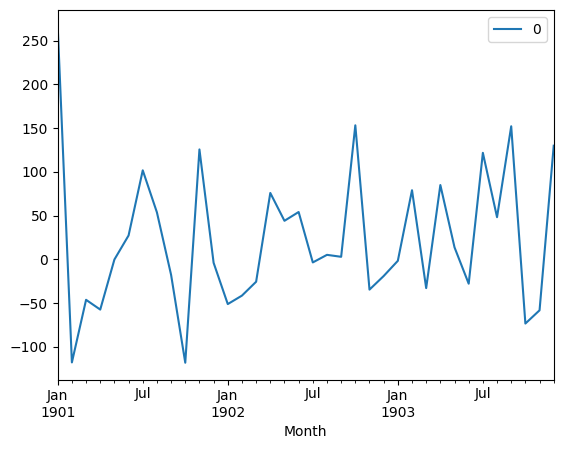

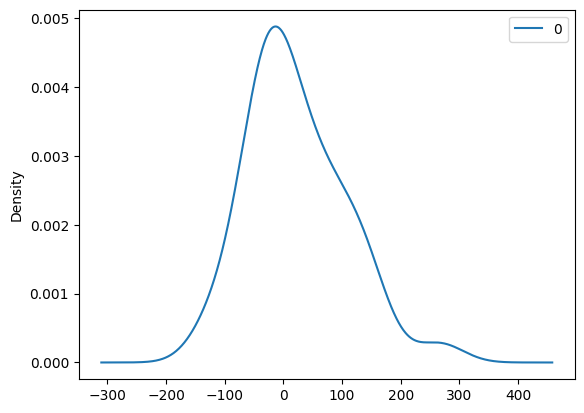

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [6]:
# 7-1 ARIMA()
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from datetime import datetime

def parser(x):
  return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('/content/drive/MyDrive/ESAA/OB 과제/sales.csv', header=0, parse_dates=[0],
                  index_col=0, date_parser=parser)
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

<ipython-input-12-eb1e42e7c533>:12: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv('/content/drive/MyDrive/ESAA/OB 과제/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


predicted=352.85534307, expected=346.30000000
predicted=277.39803580, expected=329.70000000
predicted=368.75373423, expected=445.40000000
predicted=331.77363464, expected=325.90000000
predicted=372.07040727, expected=449.30000000
predicted=360.02087230, expected=411.30000000
predicted=454.52622973, expected=417.40000000
predicted=388.69069931, expected=545.50000000
predicted=437.63244717, expected=477.60000000
predicted=516.43762369, expected=687.00000000
predicted=520.91619059, expected=435.30000000
predicted=675.59464689, expected=587.30000000
predicted=505.20101583, expected=676.90000000
Test MSE: 9118.818


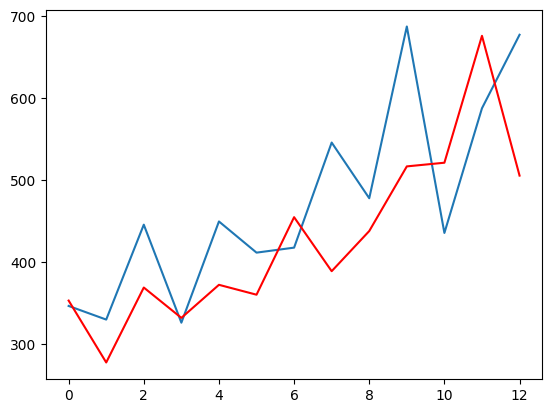

In [12]:
# 7-2 statsmodels 라이브러리를 이용한 sales 데이터셋 예측
import numpy as np
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')

df = read_csv('/content/drive/MyDrive/ESAA/OB 과제/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
series = df.iloc[:, 0]

X = series.values
X = np.nan_to_num(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]   # train과 test로 데이터셋 분리
history = [x for x in train]
predictions = list()

for t in range(len(test)):   # test 데이터셋의 길이(13)만큼 반복하여 수행
    model = ARIMA(history, order=(5, 1, 0))   # ARIMA() 함수 호출
    model_fit = model.fit()
    output = model_fit.forecast(steps=1)   # forecast() 메서드를 사용하여 예측 수행
    yhat = output[0]   # 모델 출력 결과를 yhat에 저장
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%.8f, expected=%.8f' % (yhat, obs))   # 모델 실행 결과를 predicted로 출력하고, test로 분리해 둔 데이터를 expected로 사용하여 출력

error = mean_squared_error(test, predictions)   # 손실 함수로 평균 제곱 오차 사용
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

### **7.3 순환 신경망(RNN)**

- RNN: 시간적 연속성 데이터를 처리하기 위해 고안된 인공 신경망. 기억(현재까지 입력 데이터를 요약한 정보)을 가지며 조금씩 수정됨
  - 첫번째 입력 -> 첫번째 기억 -> 두번째 입력 -> 새 기억
  - 외부 입력과 자신의 이전 상태를 이어받아 현재 상태 갱신
  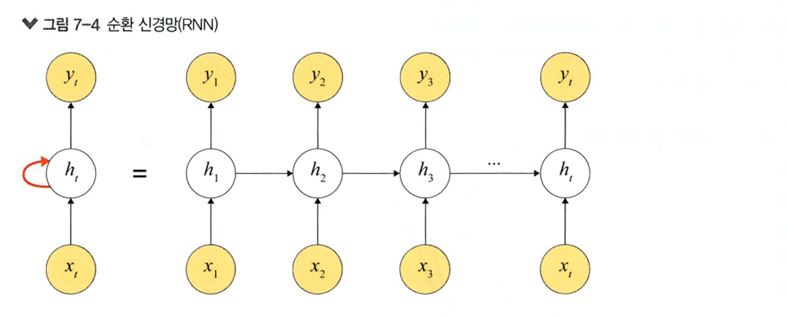

- 1. 일대일: 순환이 없으므로 RNN X. (ex.순방향)
  2. 일대다: 입력이 하나고 출력이 다수 (ex. 이미지 캡션)
  3. 다대일: 입력이 다수이고 출력이 하나 (ex.감성 분석기)
  ```
  # 다대일 구조 파이토치 구현
  self.em = nn.Embedding(len(TEXT.vocab.stoi), embeding_dim) ------임베딩 처리
  self. rnn = nn. RNNCell(input_dim, hidden_size) ------ RNN 적용
  self.fc1 = nn.Linear(hidden_size, 256) ------ 완전연결층
  self.fc2 = nn.Linear(256, 3) ------ 출력층
  ```
  4. 다대다: 입력과 출력이 다수인 구조 (ex. 자동 번역기)
  ```
  # 시퀀스 투 시퀀스 이용해 사용
  Seq2Seq(
    (encoder): Encoder(
      (embedding): Embedding(7855, 256)
      (rnn): LSTM(256, 512, num_layers=2 , dropout=0.5) (dropout): Dropout( p=0 .5, inplace=False))
    (decoder): Decoder(
      (embedding): Embedding(5893, 256)
      (rnn): LSTM(256, 512, num_layers=2 , dropout=0 .5 )
      (fc_out): Linear( in_features=51ι out_features=5893, bias=True )
      (dropout): Dropout( p=0.5 , inplace=False)))
  ```
  5. 동기화 다대다: 입력과 출력이 다수. (ex. 프레임 수준의 비디오 분류)

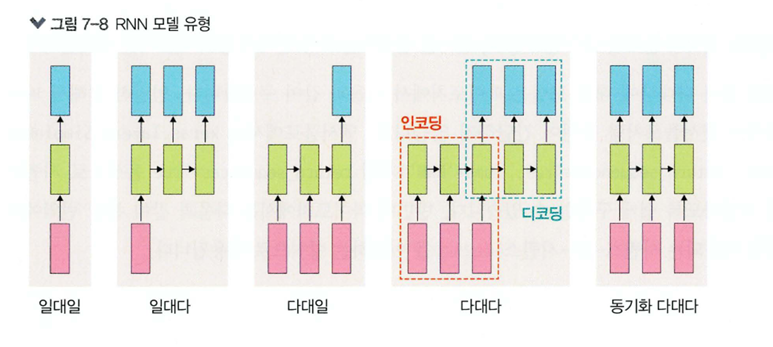

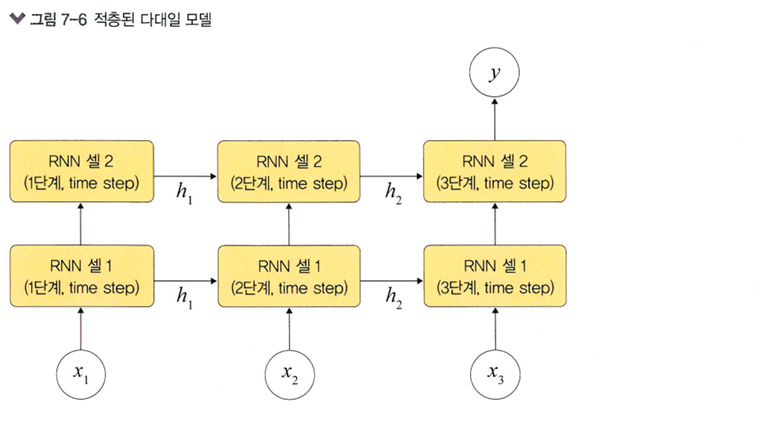

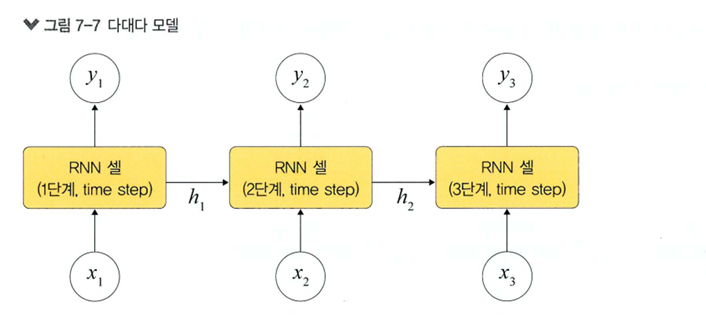

7.3.1 RNN 계층과 셀

- RNN은 내장된 계층 뿐 아니라 셀 레벨의 API도 제공.
  - RNN 셀: 오직 하나의 단계만 처리. RNN 계층의 for loop 구문을 갖는 구조
  - RNN 계층: 입력된 배치 순서대로 모두 처리. 셀을 래핑해 동일 셀을 여러 단계에 적용
  - 파이토치에서 둘을 분리해 구현함
- 셀 유형: nn.RNNCell(SimpleRNN 계층에 대응되는 셀), nn.QPUCell(GRU 계층에 대응되는 GRU셀), nn.LSTMCell(LCTM 계층에 대응되는 LSTM 셀)
- RNN 대표적 활용분야 = 자연어 처리, 시계열 데이터 처리

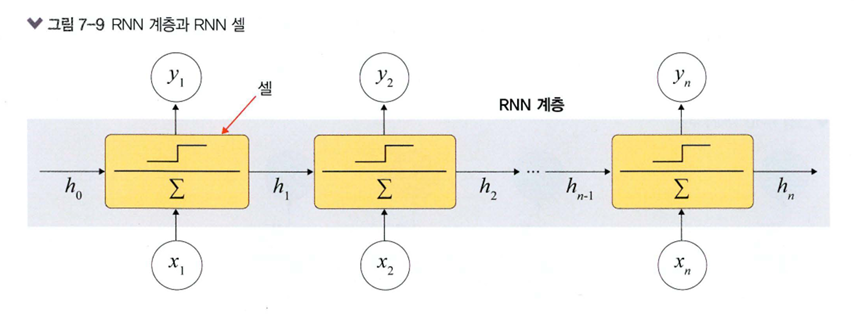

---

# **RNN 실습코드** ⌨

- RNN의 입출력 단위가 단어 레벨이 아닌 문자 레벨로 한 문자 단위 RNN을 다대다 구조로 구현하는 실습

### **1. 문자 단위 RNN(Char RNN)**

(1) 훈련 데이터 전처리하기

: apple 입력 -> pple! 출력 하는 RNN 구현

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [14]:
# 입력 데이터와 레이블 데이터에 대해 문자 집합 생성(중복 제거 집합)
# !, a, e, l, p 5개의 문자
input_str = 'apple'
label_str = 'pple!'
char_vocab = sorted(list(set(input_str+label_str)))
vocab_size = len(char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합의 크기 : 5


In [15]:
input_size = vocab_size # 입력의 크기는 문자 집합의 크기
hidden_size = 5
output_size = 5
learning_rate = 0.1

- 문자 집합에 고유 정수 부여
- 입력 데이터와 레이블 데이터의 각 문자들을 정수로 맵핑

In [16]:
char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 문자에 고유한 정수 인덱스 부여
print(char_to_index)

{'!': 0, 'a': 1, 'e': 2, 'l': 3, 'p': 4}


In [17]:
# 반대로 예측을 다시 문자 시퀀스로 보기 위해 만들어둠
index_to_char={}
for key, value in char_to_index.items():
    index_to_char[value] = key
print(index_to_char)

{0: '!', 1: 'a', 2: 'e', 3: 'l', 4: 'p'}


In [18]:
# 매핑
x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in label_str]
print(x_data)
print(y_data)

[1, 4, 4, 3, 2]
[4, 4, 3, 2, 0]


In [19]:
# 배치 차원 추가(nn.RNN()은 3차원 텐서 기본으로 입력받기 때문)
# 텐서 연산인 unsqueeze(0)를 통해 해결할 수도 있음.
x_data = [x_data]
y_data = [y_data]
print(x_data)
print(y_data)

[[1, 4, 4, 3, 2]]
[[4, 4, 3, 2, 0]]


- 입력 시퀀스의 각 문자들을 원핫인코딩

In [20]:
x_one_hot = [np.eye(vocab_size)[x] for x in x_data]
print(x_one_hot)

[array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])]


In [21]:
X = torch.FloatTensor(x_one_hot) # 텐서로 바꾸기
Y = torch.LongTensor(y_data)

<ipython-input-21-c1bfbd518a63>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  X = torch.FloatTensor(x_one_hot)


In [22]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([1, 5, 5])
레이블의 크기 : torch.Size([1, 5])


(2) 모델 구현하기

- RNN모델 구현, fc는 완전연결층(출력층으로 사용)
- 모델을 클래스로 정의해 net에 저장

In [23]:
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True) # RNN 셀 구현
        self.fc = torch.nn.Linear(hidden_size, output_size, bias=True) # 출력층 구현

    def forward(self, x): # 구현한 RNN 셀과 출력층을 연결
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [24]:
net = Net(input_size, hidden_size, output_size)

In [25]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서(배치 차원, 시점, 출력의 크기)

torch.Size([1, 5, 5])


In [26]:
print(outputs.view(-1, input_size).shape) # 2차원 텐서로 변환(배치 차원과 시점 차원을 하나도 만듦)

torch.Size([5, 5])


In [27]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([1, 5])
torch.Size([5])


- 옵티마이저와 손실 함수 정의, 100 에포크로 학습

In [28]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [29]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, input_size), Y.view(-1)) # view를 하는 이유는 Batch 차원 제거를 위해
    loss.backward() # 기울기 계산
    optimizer.step() # 아까 optimizer 선언 시 넣어둔 파라미터 업데이트

    # 아래 세 줄은 모델이 실제 어떻게 예측했는지를 확인하기 위한 코드.
    result = outputs.data.numpy().argmax(axis=2) # 최종 예측값인 각 time-step 별 5차원 벡터에 대해서 가장 높은 값의 인덱스를 선택
    result_str = ''.join([index_to_char[c] for c in np.squeeze(result)])
    print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  1.6094048023223877 prediction:  [[0 0 0 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  !!!e!
1 loss:  1.3942492008209229 prediction:  [[3 0 3 2 3]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  l!lel
2 loss:  1.210526466369629 prediction:  [[4 4 4 4 4]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  ppppp
3 loss:  1.0205446481704712 prediction:  [[4 4 3 2 4]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pplep
4 loss:  0.8366079330444336 prediction:  [[4 4 3 2 4]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pplep
5 loss:  0.6674165725708008 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
6 loss:  0.5150883197784424 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
7 loss:  0.38859039545059204 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
8 loss:  0.28314611315727234 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
9 loss:  0.1956353336572647 prediction:  [[4 4 3 2 0]]

### **2. 더 많은 데이터로 학습한 문자 단위 RNN(Char RNN)**

(1) 훈련 데이터 전처리하기

- 문자 집합 생성, 각 문자에 고유 정수 부여
- 입력은 원핫 벡터로 사용(매 시점마다의 입력 크시는 문자 집합 크기)
- 하이퍼 파라미터 설정(hidden_size-은닉 상태 크기)
- sequence_length로 샘플을 10개씩 잘라 사용

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim

In [31]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [32]:
char_set = list(set(sentence)) # 중복을 제거한 문자 집합 생성
char_dic = {c: i for i, c in enumerate(char_set)} # 각 문자에 정수 인코딩

In [33]:
print(char_dic) # 공백도 여기서는 하나의 원소

{' ': 0, 'b': 1, 's': 2, 'y': 3, 't': 4, 'd': 5, 'n': 6, ',': 7, 'u': 8, 'i': 9, 'l': 10, '.': 11, 'p': 12, "'": 13, 'f': 14, 'h': 15, 'o': 16, 'k': 17, 'c': 18, 'a': 19, 'w': 20, 'e': 21, 'm': 22, 'r': 23, 'g': 24}


In [34]:
dic_size = len(char_dic)
print('문자 집합의 크기 : {}'.format(dic_size))

문자 집합의 크기 : 25


In [35]:
# 하이퍼파라미터 설정
hidden_size = dic_size
sequence_length = 10  # 임의 숫자 지정
learning_rate = 0.1

In [36]:
# 데이터 구성
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x_data.append([char_dic[c] for c in x_str])  # x str to index
    y_data.append([char_dic[c] for c in y_str])  # y str to index

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [37]:
print(x_data[0])
print(y_data[0])

[9, 14, 0, 3, 16, 8, 0, 20, 19, 6]
[14, 0, 3, 16, 8, 0, 20, 19, 6, 4]


- 위의 결과를 보면 한 칸씩 쉬프트 된 시퀀스가 정상적으로 출력
- 입력 시퀀스 원핫 인코딩 -> 입력/레이블 데이터 텐서 변환

In [38]:
x_one_hot = [np.eye(dic_size)[x] for x in x_data] # x 데이터는 원-핫 인코딩
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [39]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([170, 10, 25])
레이블의 크기 : torch.Size([170, 10])


In [40]:
print(X[0])

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [41]:
print(Y[0])

tensor([14,  0,  3, 16,  8,  0, 20, 19,  6,  4])


(2) 모델 구현하기

- 은닉층 두 개 쌓기
- nn.RNN()의 num_layers: 은닉층 개수
- 옵티마이저, 손실함수 정의
- view()로 배치차원+시점 차원 -> 2차원 텐서로 변환
- 처음엔 예측이 이상해도 마지막 에포크에서는 정확한 문자 생성


In [42]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers): # 현재 hidden_size는 dic_size와 같음.
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [43]:
net = Net(dic_size, hidden_size, 2) # 이번에는 층을 두 개 쌓습니다.

In [44]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [45]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([170, 10, 25])


In [46]:
print(outputs.view(-1, dic_size).shape) # 2차원 텐서로 변환.

torch.Size([1700, 25])


In [47]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([170, 10])
torch.Size([1700])


In [48]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X) # (170, 10, 25) 크기를 가진 텐서를 매 에포크마다 모델의 입력으로 사용
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    # results의 텐서 크기는 (170, 10)
    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0: # 처음에는 예측 결과를 전부 가져오지만
            predict_str += ''.join([char_set[t] for t in result])
        else: # 그 다음에는 마지막 글자만 반복 추가
            predict_str += char_set[result[-1]]

    print(predict_str)

e geeegedee e  ee  e eeeee e eee e eee  e e e  ee e e ed eee  eedee egee  eee  e e e edde eded  eedd d ee  eee eg ee eeed eeee eeged eee eeee eeed ed eee eeddde  eedee eee ed ed d
                                                                                                                                                                                   
ooe oo aoooeoooeooooeooooooooooooooooeooooo oooo ooooo oooeooooeooo ooooo hoooe oooooooeooooooootooo gooo ooooo ooo  oooooooooooeoooooooooo ooooooeooooaooo ooooooooooo ooooooooeoo
                                                                                                                                                                                   
psppkk.k.kk.kkk.k.kk.k.kkkku.lkkplppkkku.,p.kkkkk.kkkpukpu.ku.kkk.k.up.kk.uk.ukkukplpkkkkkk.kkkuk.ukkk.k.,.kkuklkkk.p.ukkk.pkkkkup.u.uk.upkkkkp.kk.ukkpk.ukkkk.k.u.lk.kk.kk.ukkpk.u
thdtemthtererem hehm rtmedhedemeteeerthemem hdemethtemmmetthrtdmemmtet dmmererthmdtetemetdmdrtedmhem